<a href="https://colab.research.google.com/github/adrianatrevinoe/ArtificialInteligenceWorks/blob/main/hw_07_logistic_classifier_with_regularisation_ipynb(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Universidad de Monterrey
##### Department of Mechanical and Electronic Engineering

Course: Artificial intelligence   
Lecturer: Andrés Hernández Gutiérrez     
Due date: Monday 18 April 2022 (16.00hrs)    
**Collaborative assignment**

**To complete this assignment:** upload your Notebook to Blackboard. This time you do not need to upload neither the training nor the testing data.

---


In this programming assignment, you will implement a Logistic Regressor in Python. The core of your development will be the implementation of the Gradient Descent optimiser for image classification. The workflow for this task is splitted as follows:

  1. [Read image data from Google Drive](#section-01). 
  2. [Perform a exploratory image data analysis](#section-02).
  3. [Preprocess the image dataset](#section-03).
  4. [Implement the AILogisticClassifier class for logistic classification](#section-04).
  5. [Train your logistic classifier using the own implementation](#section-05).
  6. [Test your logistic classifier](#section-06).
  7. [Compute the performance metrics of your logistic classifier](#section-07).
  8. [Test your logistic classifier using your own cat/non-cat image](#section-08)
  9. [Individual conclusions](#section-09)
  10. [References](#section-10)


<a name="section-01"></a>
### 1. Read image data from Google Drive.

Permite el acceso al drive personal de cada integrante del equipo para la obtencion de datos de los archivos `test_catvnoncat.h5` y `test_catvnoncat.h5`

In [1]:
# Mounts Google Drive in Collab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importa las librerias:
+ ```numpy```: this is used for scientific computation.
+ ```matplotlib```: this allows us to visualise plots.
+ ```h5py```: lets you store huge amounts of numeric data, manipulates numpy data too. //contiene imagenes de prueba que utilizaremos
+ ```sklearn```:One of the most useful libraries for machine learning, contains functions for machine learning, statistical modeling (classification, regression, clustering and dimensionality reduction).

Aquí importa nadamas métodos de los submodulos de la libreria sklearn los cuales son `train_test_split` y `LogisticRegression`.


Explain what the cell below does and complete the DocString documentation inside ```load_data()```.
Cargamos los datos 

In [2]:
# Imports standard libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import imageio
import cv2
import numpy as np

# Agregados
from sklearn.utils import shuffle
from PIL import Image

In [3]:
# Utility function to load image dataset
def load_data(path_and_filename_to_training_data, path_and_filename_to_testing_data):
  """
  COMPLETE THE INFORMATION REGARDING TO INPUTS/OUTPUTS
  Loads the training and testing datasets.
      
      INPUTS: 
      path_and_filename_to_training_data: Especifica el path y file de los datos de entrenamiento (train)
      path_and_filename_to_testing_data:  Especifica el path y file de los datos de prueba (testing)

      OUTPUTS:
      x_train: arreglo de datos de entrenamiento
      y_train: arreglo de ceros y unos (0 no es gato, 1 es gato)
      x_test: arreglo de datos de testing 
      y_test: arreglo de ceros y unos (0 no es gato, 1 es gato)
      classes: si no es gato o si es gato
  """

  # Load training set
  train_set = h5py.File(path_and_filename_to_training_data, "r")
  
  # Split the training set into features and labels
  x_train = np.array(train_set["train_set_x"][:])
  y_train = np.array(train_set["train_set_y"][:])

  # Load testing set
  test_set = h5py.File(path_and_filename_to_testing_data, "r")

  # Split the testing set into features and labels
  x_test = np.array(test_set["test_set_x"][:])
  y_test = np.array(test_set["test_set_y"][:])

  # Get list of classes
  classes = np.array(test_set["list_classes"][:])

  # Reshape labels for the training and test sets
  y_train = y_train.reshape((1, y_train.shape[0]))
  y_test = y_test.reshape((1, y_test.shape[0]))

  return x_train, y_train, x_test, y_test, classes

Download the following image datasets to train and test you Logistic Classifier:

+ [Training data](https://drive.google.com/file/d/1WGZn0hG0ePOYYc3rQMiNycR1eL0lCI8t/view?usp=sharing)
+ [Testing data](https://drive.google.com/file/d/1XDFEbijnqsFVjWRZhB7FnfoaxUPXzFqn/view?usp=sharing)

Upload this image datasets to Drive in the path specified below: 

In [4]:
#Loads data from files
path_and_filename_to_training_data = "/content/drive/MyDrive/Colab Notebooks/datasets/cats-vs-non-cats/train_catvnoncat.h5"
path_and_filename_to_testing_data = "/content/drive/MyDrive/Colab Notebooks/datasets/cats-vs-non-cats/test_catvnoncat.h5"

*   path_and_filename_to_training_data is assigned to x_train and y_train.
*   path_and_filename_to_testingg_data is assigned to x_test and y_test.
*   classes define las clases, si no es gato o si es gato

In [5]:
# Assigning and separating data
x_train, y_train, x_test, y_test, classes = load_data(path_and_filename_to_training_data, path_and_filename_to_testing_data)

<a name="section-02"></a>
## 2. Exploratory image data analysis
+ ```shape```: _Indica cuantas columnas y filas se tiene en un arreglo, te da el tamaño del archivo.
+ ```f-string```: _Imprime palabras, letras, números etc. en forma de un string, tiene {} para reemplazar valores. Lo que imprime va dentro de ""._

Imprime datos de las imagenes que se tienen de las imágenes de training y testing.

+ **Size of training/testing images** nos dice cuantas imágenes tendremos en total. 
+ **Size of single images withing the training/testing set** nos dice la dimension que tendrá cada imagen. (se reescalan las imagenes a una dimensión más pequeña para no demorar el programa y no crear vectores de caracteristicas muy grandes), (alto, largo, bandas)
+ **Size of training/testing feautures per images** nos dice el tamaño del vector de caracteristicas de cada imagen.
+ **Size of training/testing labels** las salidas serán de 0 o 1 por cada imagen.

In [6]:
# datos de imagenes de training data
print(35*"-"+" TRAINING DATA "+35*"-")
print(f"Size of training images: {x_train.shape[0]}")
print(f"Size of single images within the training set (width, height, channels): {x_train.shape[1:]}")
print(f"Size of training features per image ({x_train.shape[1]} x {x_train.shape[2]} x {x_train.shape[3]}): {x_train.shape[1]*x_train.shape[2]*x_train.shape[3]}")
print(f"Size of training labels: {y_train.shape}")

# Datos de las imágenes de testing data
print("\n"+35*"-"+" TESTING DATA "+36*"-")
print(f"Size of testing images: {x_test.shape[0]}")
print(f"Size of single images within the testing set (width, height, channels): {x_test.shape[1:]}")
print(f"Size of testing features per image ({x_test.shape[1]} x {x_test.shape[2]} x {x_test.shape[3]}): {x_test.shape[1]*x_test.shape[2]*x_test.shape[3]}")
print(f"Size of testing labels: {y_test.shape}")

----------------------------------- TRAINING DATA -----------------------------------
Size of training images: 209
Size of single images within the training set (width, height, channels): (64, 64, 3)
Size of training features per image (64 x 64 x 3): 12288
Size of training labels: (1, 209)

----------------------------------- TESTING DATA ------------------------------------
Size of testing images: 50
Size of single images within the testing set (width, height, channels): (64, 64, 3)
Size of testing features per image (64 x 64 x 3): 12288
Size of testing labels: (1, 50)


###### Modify the cell below so that it can visualise a 5-cols x 5-rows grid of images randomly selected from the training set - _hint: you may find [this information](https://matplotlib.org/3.5.1/gallery/axes_grid1/simple_axesgrid.html) useful. The corresponding class label, either 1 or 0, should be included as part of the title in each image.


<Figure size 432x288 with 0 Axes>

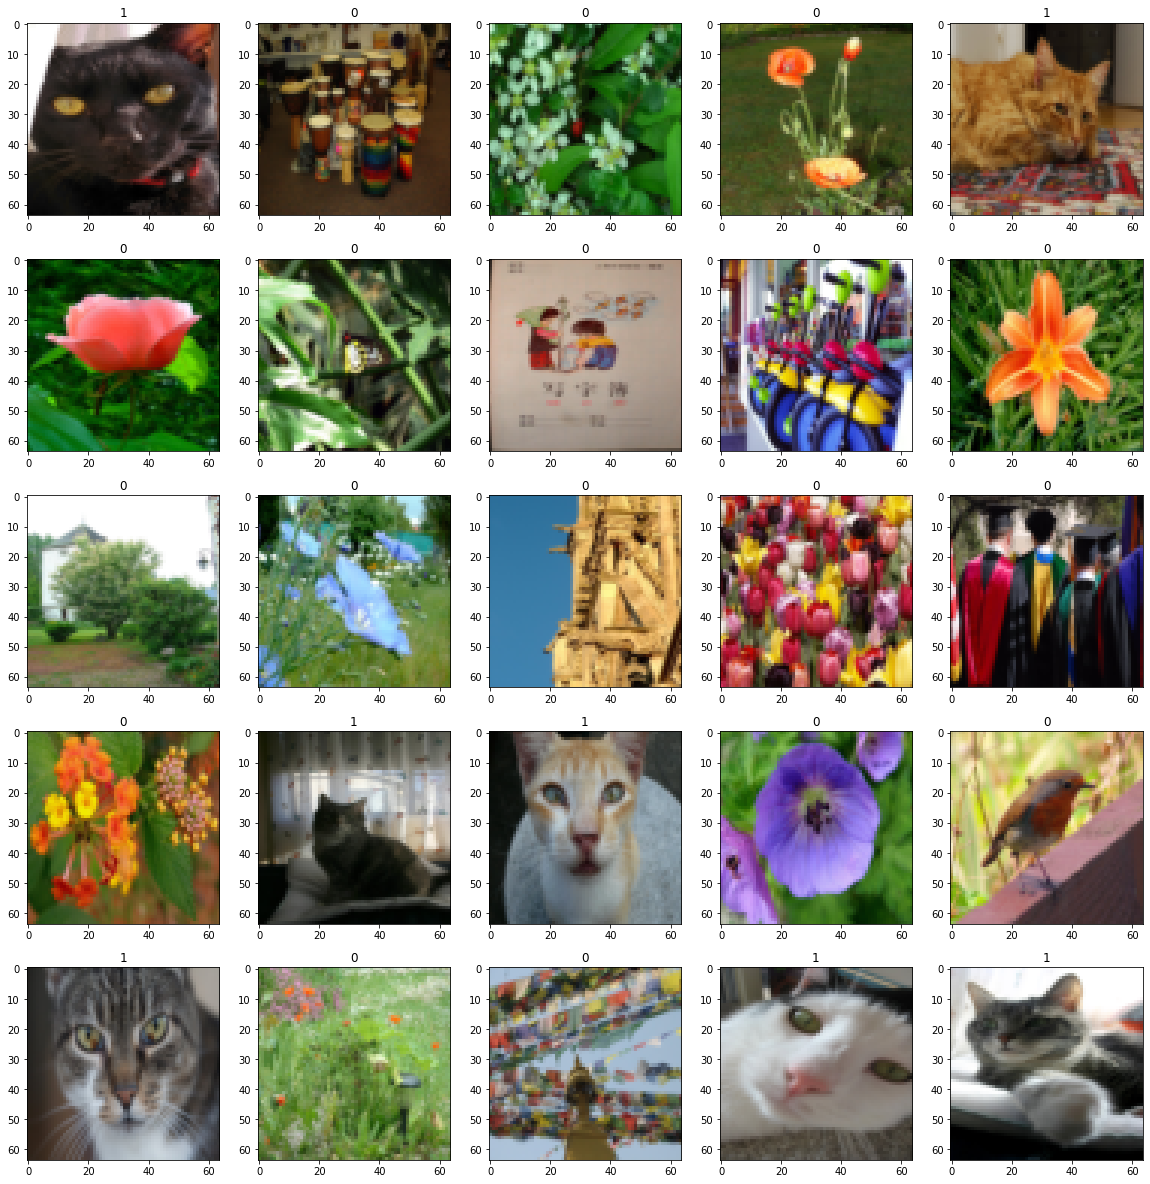

In [7]:
# Visualise a small set of images that are part of the training image dataset
fig = plt.figure()
fig, axes_array = plt.subplots(5, 5, figsize=(20, 21))

num = 0
x_train_shuffle_images, y_train_shuffle = shuffle(x_train[:], y_train.flatten())
for b in range(0,5):
  for a in range(0,5):
    axes_array[b,a].imshow(x_train_shuffle_images[num])
    axes_array[b,a].set_title(str(y_train_shuffle[num]))
    num += 1

<a name="section-03"></a>
## 3. Preprocess the image dataset

Escala las características de las imagenes, se dividen los valores posibles que pueda tener la imagen.
Cada pixel va de 0 a 255 en la escala rgb entonces cuando dividimos esta máxima escala, todos los pixeles de las imágenes estarán en el rango de 0 y 1.

In [8]:
# Scale the features
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

<a name="section-04"></a>
## 4. Implement the AILogisticClassifier class for logistic classification


**[GRADED]** The cell below should implement the Python Class ```AIRegularisedLogisticClassifier```. Make sure you implement the following methods as part of this class:

+ ```def normalise_training_data(self, x):``` This function should normalises the training features; make sure you save both the mean and standard deviation of the features, as you will need then when normalising the testing data.
+ ```def normalise_testing_data(self, x):``` This function uses the mean and standard deviation of the normalised training features to normalise the testing data.
+ ```def fit(self, X, y, w, l_rate=0.01, l2_norm=0.001):``` Fit the linear model to the training data by calling the ```gradient_descent()``` function.
+ ```def gradient_descent(self):``` This function implements the Gradient descent optimiser.
+ ```def predict(self, x):``` This function makes a linear prediction based on cost and gradient descent
+ ```def compute_confusion_matrix(args):``` This function evaluate the accuracy of a classification
+ ```def compute_accuracy(args):``` This function returns the accuracy of the network on the given batch
+ ```def compute_precision(args):``` This function quantifies the number of positive class predictions that actually belong to the positive class
+ ```def compute_recall(args):``` This function quantifies the number of positive class predictions made out of all positive examples in the dataset.
+ ```def compute_specificity(args):``` This function calculates the number of correct negative predictions divided by the total number of actual negatives
+ ```def compute_f1_score(args):``` This function is a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 
+ ```def print_performance_metrics(args):``` This function evaluates the model 

where ```args``` should be specified accordingly. 

x is a 2-dimensional matrix that
summarises how the predicted classes differ from the actual classes; the latter are
also called ground-truth

In [9]:
""" 
En esta sección basicamente se hace casi todo el procedimiento de clasifiación al igual que se mandan
a llamar los parametros, no usamos la función de sklearn para obtener la matriz de confusión, fue todo
"a mano".

Se agrego también la parte para poder regularizar los datos la cual es por cada carateristica que tenemos multipliamos un
valor lambda y la caracteristica se eleva al cuadrado, esta hará que se tenga un mejor modelo
"""
class AIRegularisedLogisticClassifier:

  # Se opto por optimizar las funciones normalise_training_data(self, x) y
  # normalise_testing_data(self, x) en una sola, normalise_data(self, x). Esta
  # nueva funcion almacena el dato de la primera utilizacion, guardando asi el
  # maximo y minimo de los datos de entrenamiento.
  @classmethod                  # Se uso el decorador @classmethod que pasan al
  def normalise_data(self, x):  # objeto de clase real dentro de la funcion.
    # El try except se encarga de identificar si previamente se uso la funcion
    # para recuperar los valores guardados, maximo y minimo a partir de los
    # datos de entrenamiento.
    try:
      minX = self.minX
    except:
      self.minX = np.min(np.matrix(x))
      minX = self.minX
    try:
      maxX = self.maxX
    except:
      self.maxX = np.max(np.matrix(x))
      maxX = self.maxX
    # Los whites, originalemente se planearon como blancos en terminos de RGB
    # pero por practicidad y mejor aplicacion del metodo, se modificaron para
    # ser unos despues del ajuste de los datos mediante "Normalizacion".
    whites = np.ones([x.shape[0],1])
    x = (x - minX)/(maxX - minX)
    self.x = np.hstack([whites, x])
    return self.x

  # La funcion fit se uso para la declaracion de las variables necesarias para
  # ajustar la linea de clasificacion logistica hacia los datos. Se definio una
  # w = [] como entrada determinada para poder declarar una w de ceros con la
  # longitud de los parametros de x incluyendo x0 -> [x0, x1, x2, ..., xn].
  @classmethod
  def fit(self, x, y, w = [], learning_rate=0.01, l2_norm=0.01, lambd=10):
    # Se llama a la funcion normalise_data(x) y como esta funcion regresa el
    # atributo x como propio de la clase, ya se define self.x sin necesidad de
    # igualarlo en la funcion.
    self.normalise_data(x)
    self.y = y
    self.N = self.x.shape[0]          # Numero de muestras del conjunto de datos
    # Este if else define si w no es un arreglo vacio. Si lo es, define un
    # atributo w [self.w] del tamaño de los datos normalizados de x (incluyendo 
    # los unos de x0) [x0, x1, x2, ..., xn]; en caso contrario, define un
    # atributo w con el dato ingresado w al llamar a la funcion.
    if bool(np.size(w)):
      self.w = w
    else:
      self.w = np.zeros([np.size(self.x,1),1])
    self.l_rate = learning_rate
    self.l2_norm = l2_norm
    self.lambd = lambd
    # Se define el atributo coef_ llamando a la funcion gradient_descent(self)
    # la cual regresa la ultima actualizacion de w.
    [self.coef_, self.plotL2] = self.gradient_descent(self)
    return self

  # Funcion que genera el calculo del metodo Gradiente Descendente a partir de
  # los datos del fit, atributos de la clase AIRegularisedLogisticClassifier.
  def gradient_descent(self):
    w = self.w
    lambd = self.lambd
    L2_grad_of_cost = 100
    L2_GoC = L2_grad_of_cost
    # While que se ejecuta hasta llegar al valor establecido de l2_norm
    while L2_grad_of_cost > self.l2_norm:
      # Para esta tarea w[12289,1] y x[209,12289], entonces el matmul de
      # [1,12289] con [12289,209] es [1,209] que serian los calculos para las
      # 209 muestras de los datos de entrenamiento.
      L = 1/(1 + np.exp(-np.matmul(np.transpose(w), self.x.transpose())))
      errors = np.subtract(L, self.y)       # Queda con las dimensiones [1,209]
      # Como errors[1,209] y x[209,12289] entonces [1,12289]/[1,1] y trasnpuesto
      # quedaria como [12289,1].
      grad_of_cost_func = np.transpose(np.matmul(errors, self.x)/self.N)

      #Regresion
      newW = np.zeros([len(w),1])
      newW[1:] = w[1:]
      regresion = lambd*newW/self.N
      grad_of_cost_func += regresion
      L2_grad_of_cost = np.linalg.norm(grad_of_cost_func,2)
      L2_GoC = np.append(L2_GoC, L2_grad_of_cost)

      w = np.subtract(w, np.multiply(self.l_rate, grad_of_cost_func))
      
    self.w = w
    return [w, L2_GoC]

  # Prediccion de los datos, si es gato o no es gato
  @classmethod
  def predict(self, x):
    w = self.w
    self.normalise_data(x)
    # Se realiza la prediccion con la ecuacion de L
    self.y_pred = 1/(1 + np.exp(-np.matmul(np.transpose(w), self.x.transpose())))
    return self.y_pred

  # Genera la matriz de confusion a partir de las predicciones y los valores
  # reales (1's o 0's) de las imagenes usadas para generar las predicciones
  @classmethod
  def compute_confusion_matrix(self, y_pred, y):
    # Determina las posiciones de valores que si fueron acertados en la prediccion
    truePred = sum([(y_pred - y) == 0])
    # Determina las posiciones de valores que no fueron acertados en la prediccion
    falsePred = sum([(y_pred - y) != 0])
    # True Positive. El atributo truePositiveBoolean guarda las posiciones donde
    # se dieron los True Positive, mientras que truePositive suma cuantos datos
    # si fueron True Positive.
    self.truePositiveBoolean = np.multiply(truePred, y)
    self.truePositive = sum(self.truePositiveBoolean)
    # True Negative. El atributo trueNegativeBoolean guarda las posiciones donde
    # se dieron los True Negative, mientras que trueNegative suma cuantos datos
    # si fueron True Negative.
    self.trueNegativeBoolean = truePred - self.truePositiveBoolean
    self.trueNegative = sum(self.trueNegativeBoolean)
    # False Negative. El atributo falseNegativeBoolean guarda las posiciones
    # donde se dieron los False Negative, mientras que falseNegative suma
    # cuantos datos si fueron False Negative.
    self.falseNegativeBoolean = np.multiply(falsePred, y)
    self.falseNegative = sum(self.falseNegativeBoolean)
    # False Positive. El atributo falsePositiveBoolean guarda las posiciones
    # donde se dieron los False Positive, mientras que falsePositive suma
    # cuantos datos si fueron False Positive.
    self.falsePositiveBoolean = falsePred - self.falseNegativeBoolean
    self.falsePositive = sum(self.falsePositiveBoolean)
    return self

  # Realiza el calculo del Accuracy a partir de los atributos de la clase
  @classmethod
  def compute_accuracy(self):
    self.confusion_matrix_existence()
    trueP = self.truePositive
    trueN = self.trueNegative
    falseP = self.falsePositive
    falseN = self.falseNegative
    self.accuracy = (trueP + trueN)/(trueP + trueN + falseP + falseN)
    return self

  # Realiza el calculo del Precision a partir de los atributos de la clase
  @classmethod
  def compute_precision(self):
    self.confusion_matrix_existence()
    trueP = self.truePositive
    falseP = self.falsePositive
    self.precision = trueP/(trueP + falseP)
    return self

  # Realiza el calculo del Recall a partir de los atributos de la clase
  @classmethod
  def compute_recall(self): # or Sensitivity
    self.confusion_matrix_existence()
    trueP = self.truePositive
    falseN = self.falseNegative
    self.recall = trueP/(trueP + falseN)
    return self

  # Realiza el calculo del Specificity a partir de los atributos de la clase
  @classmethod
  def compute_specificity(self):
    self.confusion_matrix_existence()
    trueN = self.trueNegative
    falseP = self.falsePositive
    self.specificity = trueN/(trueN + falseP)
    return self

  # Realiza el calculo del F1-score a partir de los atributos de la clase
  @classmethod
  def compute_f1_score(self):
    self.confusion_matrix_existence()
    precision = self.precision
    recall = self.recall
    self.f1_score = 2*((precision*recall)/(precision + recall))
    return self

  # Realiza el calculo de las metricas llamando a cada funcion, a partir de los
  # atributos de la clase realiza los calculos, e imprime los resultados
  @classmethod
  def print_performance_metrics(self):
    # Funcion que checa si existen los atributos de la matriz de confusion. De
    # no existir dichos atributos, se imprime un aviso
    self.confusion_matrix_existence()
    self.compute_accuracy()
    self.compute_precision()
    self.compute_recall
    self.compute_specificity
    self.compute_f1_score
    print("\nCONFUSION MATRIX")
    print(chr(32)*5 + f"True Positives: \t{self.truePositive}")
    print(chr(32)*5 + f"True Negatives: \t{self.trueNegative}")
    print(chr(32)*5 + f"False Positives: \t{self.falsePositive}")
    print(chr(32)*5 + f"False Negatives: \t{self.falseNegative}\n")
    print(f"Accuracy: {self.accuracy}")
    print(f"Precision: {self.precision}")
    print(f"Recall: {self.recall}")
    print(f"Specificity: {self.specificity}")
    print(f"F1-score: {self.f1_score}")
    return

  # Funcion que checa si existen los atributos de la matriz de confusion. De
  # no existir dichos atributos, se imprime un aviso
  @classmethod
  def confusion_matrix_existence(self):
    try:
      checkExistence = self.truePositive
      checkExistence = self.trueNegative
      checkExistence = self.falsePositive
      checkExistence = self.falseNegative
    except:
      print("Se debe crear la matriz de confusion primero")
      print("\tAILogisticClassifier.compute_confusion_matrix(y_pred, y)")
    return self

  # La funcion "del" elimina atributos u objetos
  def __del__(self):
    return

# ------------------------------------------------------------------------------
#                                     NOTAS
# ------------------------------------------------------------------------------
# Las 2 lineas siguientes de codigo se deben usar cuando se desea hacer un nuevo
# fit de datos de entrenamiento:
#
# del AIRegularisedLogisticClassifier.minX
# del AIRegularisedLogisticClassifier.maxX

In [10]:
'''AIRegularisedLogisticClassifier()'''

'AIRegularisedLogisticClassifier()'

<a name="section-05"></a>
## 5. Train your Logistic Classifier

The cells below preprocessing the training data, train your Logistic Classifier and print the coefficients of the logistic model. DO NOT MODOFY THESE CELLS.

In [11]:
# Flatten the training an testing image datasets
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test_flatten = x_test .reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

# Fit the linear model to the training data
logistic_model = AIRegularisedLogisticClassifier.fit(x_train_flatten, y_train.flatten())

X train flatten (209, 12288)
X test flatten (50, 12288)


In [12]:
# Print the coefficients of the logistic model
print(f"model: {logistic_model.coef_}")
print(f"model's coefficients shape: {logistic_model.coef_.shape}")

model: [[-0.00918628]
 [ 0.01049412]
 [-0.02739518]
 ...
 [-0.01192878]
 [-0.02887073]
 [ 0.02629811]]
model's coefficients shape: (12289, 1)


 **[GRADED]** Visualise the graph of cost function and describe this graph 
+ ¿Does the Cost function converge or diverge?
La funcion de costo converge ya que llega a un "punto" si divergera no daría nada y seguiria ciclando siempre, no obtendriamos un valor.
+ ¿After how many iterations does the Gradient Descent optimiser converge?
Converge aproximadamente en 3000, si ocupo muchas iteraciones en poder llegar al valor deseado. 
+ ¿Are there any variations in the cost function graph as the iterations increases?
si hay algunas variaciones que vemos como en 1000, 1350, y 2100, vemos que se observan como "picos" antes de poder acabar y llegar al valor deseado.

In [13]:
print(logistic_model.plotL2)

[1.00000000e+02 6.71479691e+00 1.37627197e+01 ... 1.00075785e-02
 1.00013272e-02 9.99606952e-03]


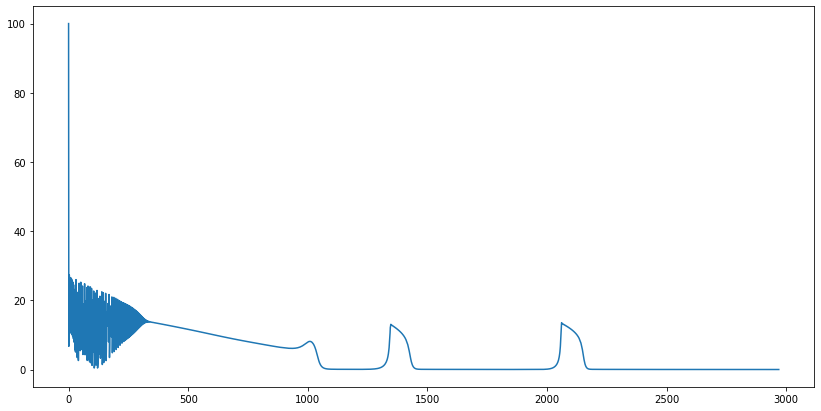

In [14]:
plt.figure(figsize=(14,7))
plt.plot(logistic_model.plotL2)

<a name="section-06"></a>
## 6. Test your Logistic Classifier

In this section, you will test your Logistic Classifier using the testing image dataset. Use as many cells as you need, but do not forget to explain what they do. 

<Figure size 432x288 with 0 Axes>

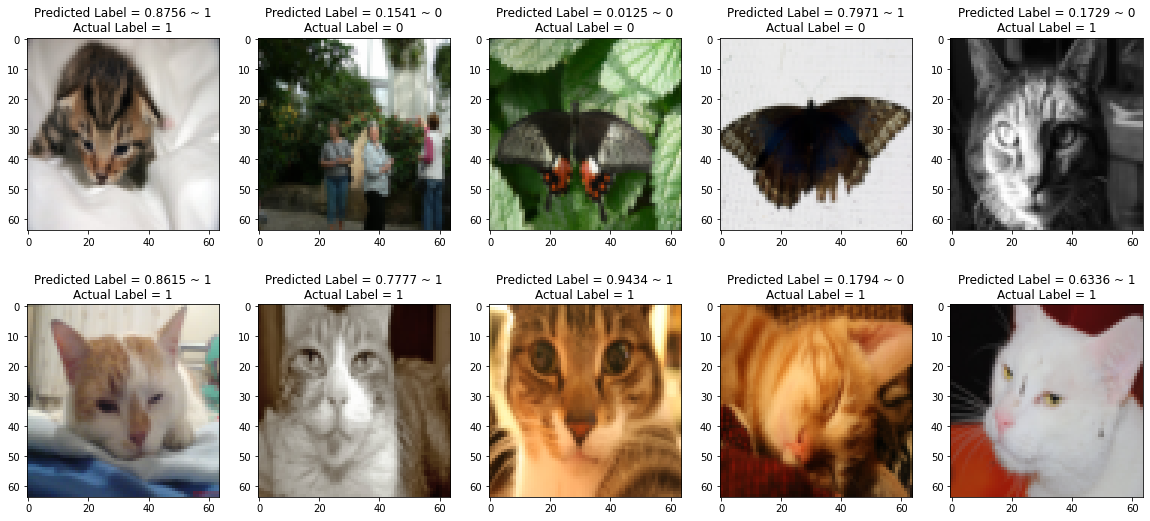

In [15]:
# This cell should show the prediction of 10 randomly selected images from the testing dataset. 
# Visualise these images as a 2x5 grid of images. Include the predicted label and the actual label
# as part of each image title, e.g., Predicted Label=0.856, Actual Label=1.

# Barajean los datos: que contienen las imagenes, los vectores de las imagenes, y, el valor real de cada imagen
x_test_shuffle_images, x_test_shuffle, y_test_shuffle = shuffle(x_test[:], x_test_flatten[:], y_test.flatten())
y_prediction = logistic_model.predict(x_test_shuffle[:10])  # Se realiza la predicion
y_predictionBinary = np.multiply([y_prediction >= 0.5],1)   # Define que datos de la predicion son 1 o 0

# Se usa el metodo flatten y se redonde a 4 decimales las predicciones
y_predText = y_prediction.round(decimals=4).flatten()
y_predTextBool = y_predictionBinary.flatten()

fig = plt.figure()
fig, axes_array = plt.subplots(2, 5, figsize=(20, 9))

num = 0
for b in range(0,2):
  for a in range(0,5):
    axes_array[b,a].imshow(x_test_shuffle_images[num])
    axes_array[b,a].set_title("Predicted Label = " + str(y_predText[num]) + chr(32) + chr(126) + chr(32) + str(y_predTextBool[num]) + "\n" + "Actual Label = " + str(y_test_shuffle[num]))
    num += 1

<a name="section-07"></a>
## 7. Compute the performance metrics of your Logistic Classifier

Performance metrics such as _accuracy_, _precision_, _recall_, _sensitivity_ and _F1_score_ will be computed in this section. Use a different cell to obtain these metrics and discuss each of them.

Mandamos a mandar la función de compute_accuracy que nos da la relación de prediciones correctas y el total de predicciones y tuvimos una exactitud de 0.9, sin regresion era 0.8, el valor mejoro y creo que ahora esta en un buen rango y tiene buena exactitud.

In [16]:
# Add your code here to call the method 'compute_accuracy' in your AIRegularisedLogisticClassifier; also print this metric.
logistic_model.compute_confusion_matrix(y_predictionBinary.flatten(), y_test_shuffle[:10]).compute_accuracy()
print(f"Accuracy: {logistic_model.accuracy}")

Accuracy: 0.7


Mandamos a llamar la función de precisión compute_precision y da un buen valor el cual es 0.88. El clasificador lógico es preciso.


In [17]:
# Add your code here to call the method 'compute_precision' in your AIRegularisedLogisticClassifier; also print this metric.
logistic_model.compute_precision()
print(f"Precision: {logistic_model.precision}")

Precision: 0.8333333333333334


Mandamos a llamar la funcion de recall con compute.recall y no nos dio un buen número ya que tenemos 0.71, lejos de 1, ya que no todos los positivos que tuvimos fueron en reallidad positivos.

In [18]:
# Add your code here to call the method 'compute_recall' in your AILogisticClassifier; also print this metric.
logistic_model.compute_recall()
print(f"Recall: {logistic_model.recall}")

Recall: 0.7142857142857143


Mandamos a llamar la funcion de especificidad compute_specificity y fue el unico que no dio una buena metrica ya que obtuvimos 0.5, en realidad solo hizo dos predicciones de negativa, una fue correcta y otra incorrecta entonces la probabilidad no daba para ser muy alta ya que como dijimos, solo habian dos prediciones de falsos. Si hubieramos tenido mas negativos creo que hubiera aumentado mucho esta métrica.

In [19]:
# Add your code here to call the method 'compute_sensitivity' in your AILogisticClassifier; also print this metric.
logistic_model.compute_specificity()
print(f"Specificity: {logistic_model.specificity}")

Specificity: 0.6666666666666666


Mandamos a llamar la función de compute_f1_score y obtuvimos , 0.94, antes daba 0.83, nos dio un muy buen número y quiere decir que si es una buena metrica, esta balanceado entre recall y precision. 

In [20]:
# Add your code here to call the method 'compute_f1_score' in your AILogisticClassifier; also print this metric.
logistic_model.compute_f1_score()
print(f"F1-score: {logistic_model.f1_score}")

F1-score: 0.7692307692307692


Aquí mandamos a llamar la función de print_performance_metrics y nos despliega todos los parametros al igual con los valores de la matriz de confusión. Como podemos observar tuvimos un valor perfecto qu es recall, despues para accuracy., precision y f1 score tuvimos valores muy buenos que fueron arriba de 0.89, y solo tuvimos un valor bajo de 0.5 en specificity pero como dijimos, fue un valor complcado de calcular debido a que eran muy pocos negativos. Creemos que ees un muy buen modelo y mejoro mucho.

In [21]:
# Add your code here to call the method 'print_performance_metrics' in your AILogisticClassifier; also print this metric.
logistic_model.print_performance_metrics()


CONFUSION MATRIX
     True Positives: 	5
     True Negatives: 	2
     False Positives: 	1
     False Negatives: 	2

Accuracy: 0.7
Precision: 0.8333333333333334
Recall: 0.7142857142857143
Specificity: 0.6666666666666666
F1-score: 0.7692307692307692


<a name="section-08"></a>
## 8. Test your Logistic Classifier using your own cat/non-cat image

Take a photo of a cat and use it to test your logistic model; discuss your result. Also, grab a non-cat image, feed it into your logistic classifier and discuss your results.

In [22]:
# creating a object 
image = Image.open('/content/drive/MyDrive/Colab Notebooks/datasets/cats-vs-non-cats/cat.jpg')
defSize = (64, 64)
  
image.thumbnail(defSize)
  
# creating thumbnail
image.save('/content/drive/MyDrive/Colab Notebooks/datasets/cats-vs-non-cats/catResize.jpg')
image.show()



# creating a object 
image = Image.open('/content/drive/MyDrive/Colab Notebooks/datasets/cats-vs-non-cats/notCat.jpg')
defSize = (64, 64)
  
image.thumbnail(defSize)
  
# creating thumbnail
image.save('/content/drive/MyDrive/Colab Notebooks/datasets/cats-vs-non-cats/notCatResize.jpg')
image.show()

In [23]:
# Add your code here; this line should read a cat image
img_path = '/content/drive/MyDrive/Colab Notebooks/datasets/cats-vs-non-cats/catResize.jpg'
img_np0 = np.array(Image.open(img_path))
testIMG = np.reshape(img_np0.flatten(),[1,-1])

In [24]:
# Add your code here; this line should read a non-cat image
img_path = '/content/drive/MyDrive/Colab Notebooks/datasets/cats-vs-non-cats/notCatResize.jpg'
img_np1 = np.array(Image.open(img_path))
testIMG = np.concatenate([testIMG, np.reshape(img_np1.flatten(),[1,-1])], axis=0)

Text(0.5, 1.0, 'Predicted Label = 0.0583\nActual Label = 0')

<Figure size 432x288 with 0 Axes>

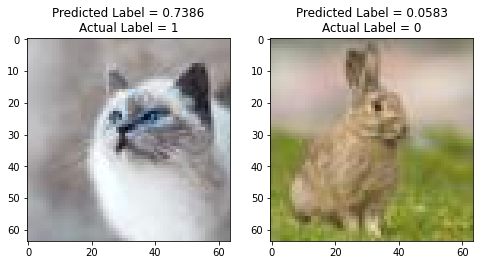

In [25]:
yPred = logistic_model.predict(testIMG)


y_predText = yPred.round(decimals=4).flatten()

fig = plt.figure()
fig, axes_array = plt.subplots(1, 2, figsize=(8, 5))

axes_array[0].imshow(img_np0)
axes_array[0].set_title("Predicted Label = " + str(y_predText[0]) + "\n" + "Actual Label = " + str(1))
axes_array[1].imshow(img_np1)
axes_array[1].set_title("Predicted Label = " + str(y_predText[1]) + "\n" + "Actual Label = " + str(0))

<a name="section-09"></a>
## 9. Individual conclusions


 Adriana: Esta tarea fue más rapida que la pasada, se agrego la regresion a la funcion del gradiente descendiente. Lo que nos dimos cuenta fue que el modelo se comportaba mejor que cuando no tenia regularisación, lo único que "empeoro" fue el specificity pero como dijimos fue porque teniamos muy pocas predicciones negativas, si hubieran habido mas estoy muy segura que hubiera subido esta metrica ya que creo que nuestro modelo de predicción es muy bueno acerto casi todas, y en todas las demás mejoraron.


Emilio: En esta practica se agrego la parte de la regresión al gradiente descendiente, en esta ocasión se pudo notar una mejoria al compararlas métricas de desempeño de la version no regularizada,pues la mayoría de las métricas en esta tarea nos dieron por arriba de 0.9 en comparación con la otra que solo nos dieron por arriba de 0.7

Susana: En la realizacion de esta tarea se pudo comprobar que el uso de la version regularizada del modelo suele generar mejor prediccion dando un F1-score mas alto, del mismo modo, las metricas de desempeño suelen ser mas altas al metodo no regularizado. Asi mismo, se observo que elimina tiempos de procesamiento en el calculo de la funcion de costo.

<a name="section-10"></a>
## 10. References

Add your references here. The following reference has been added as an example for you.

[1] Goodfellow, I., Bengio, Y., and Courville, A., _Deep Learning_, MIT Press, 2016. 



_Happy learning! - Andrés_